<a href="https://colab.research.google.com/github/abiyasa05/Machine_Learning_Ganjil_2023/blob/main/UTS_Clustering_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

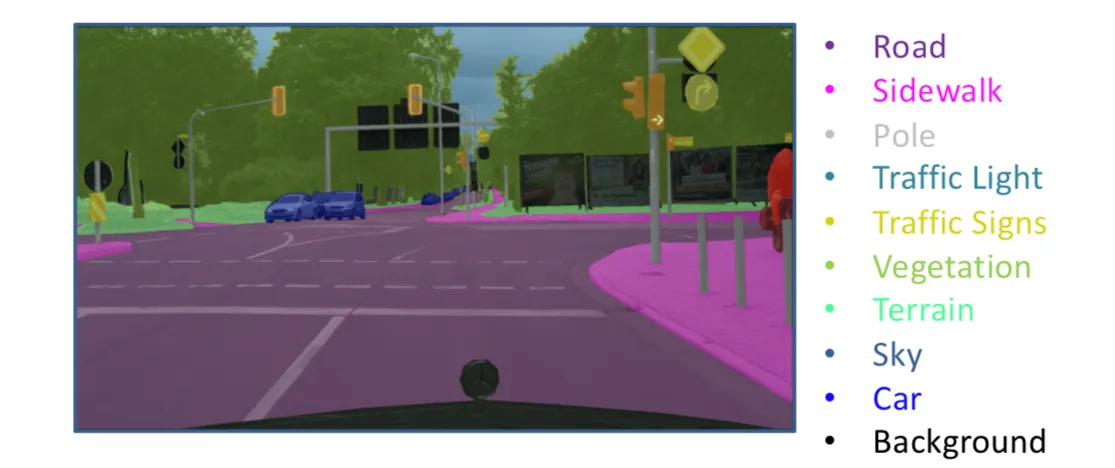

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

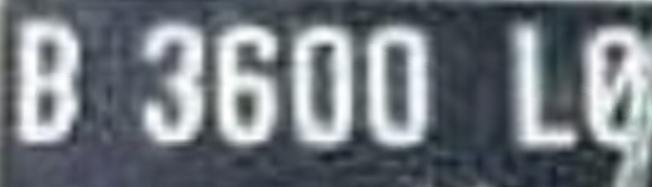

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

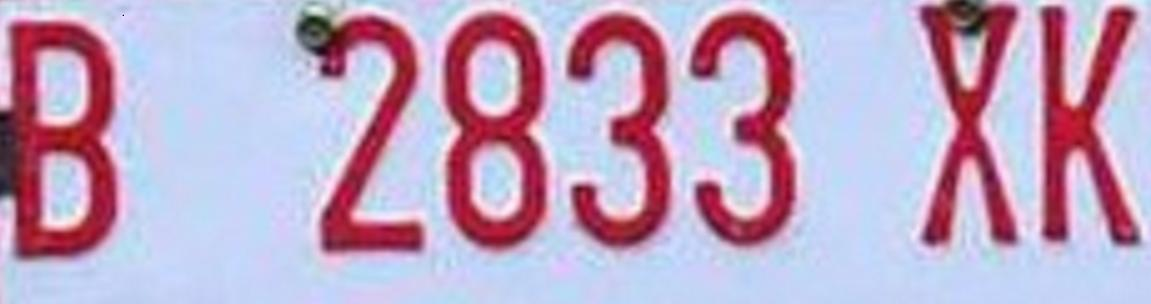

In [ ]:
# Load Gambar
img = cv2.imread('2.jpeg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

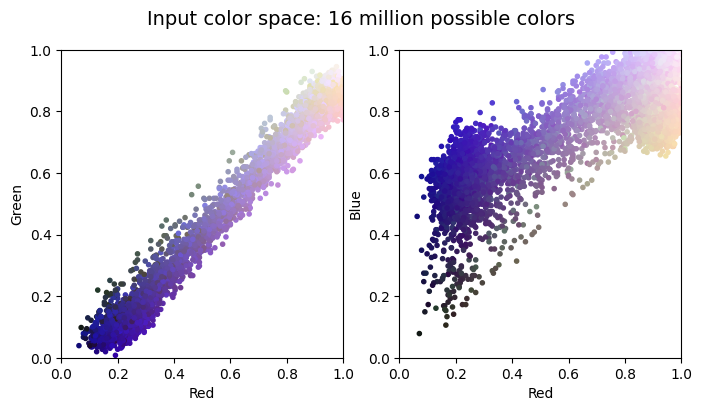

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# **Import Library**

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

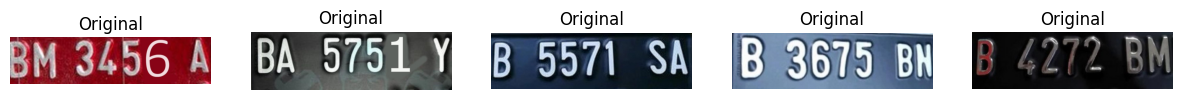

In [65]:
import os
dataset_dir = '/content/drive/MyDrive/Machine Learning/data'
selected_images = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir)]
five_plat = selected_images[:5]
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in five_plat]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')
    ax.axis('off')
plt.show()

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **PLAT NOMOR 1**

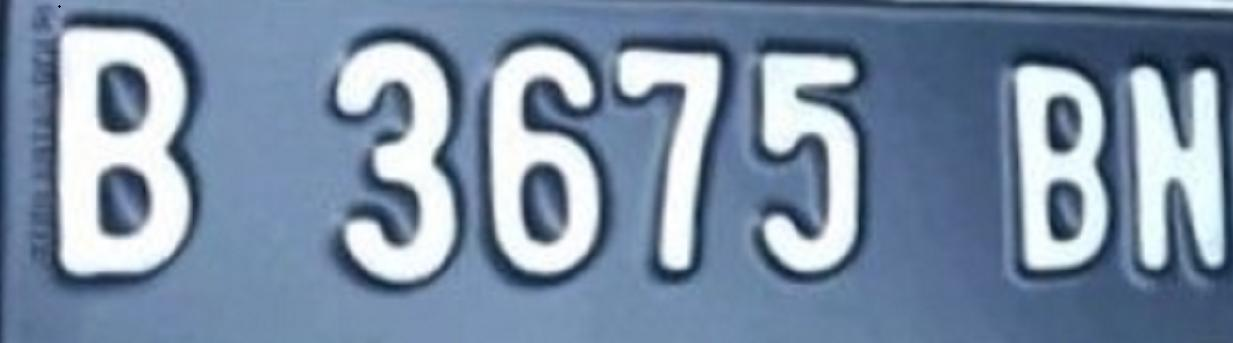

In [66]:
# Load Gambar

img = cv2.imread('/content/drive/MyDrive/Machine Learning/data/1.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img)

In [67]:
# Mencetak tinggi, lebar, saluran warna
h, w, ch= img.shape
print(h)
print(w)
print(ch)

343
1233
3


In [68]:
# Mengubah gambar menjadi data
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(422919, 3)

In [69]:
# Plotting data
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

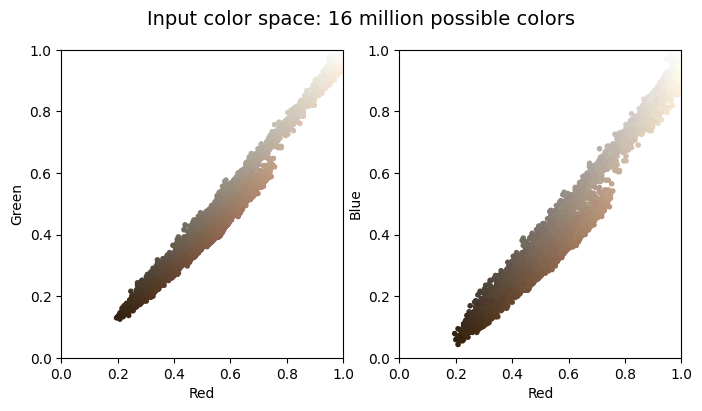

In [70]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


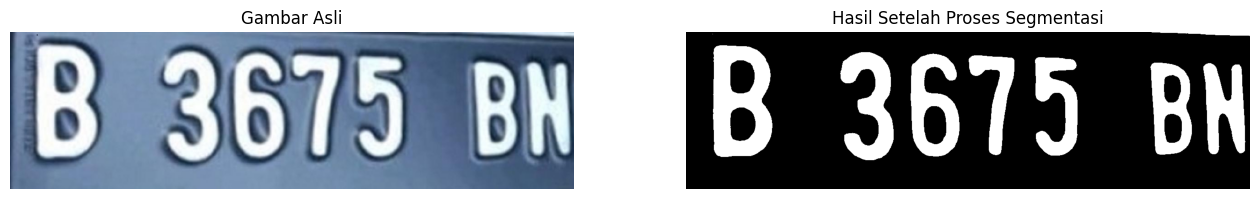

In [71]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

# **PLAT NOMOR 2**

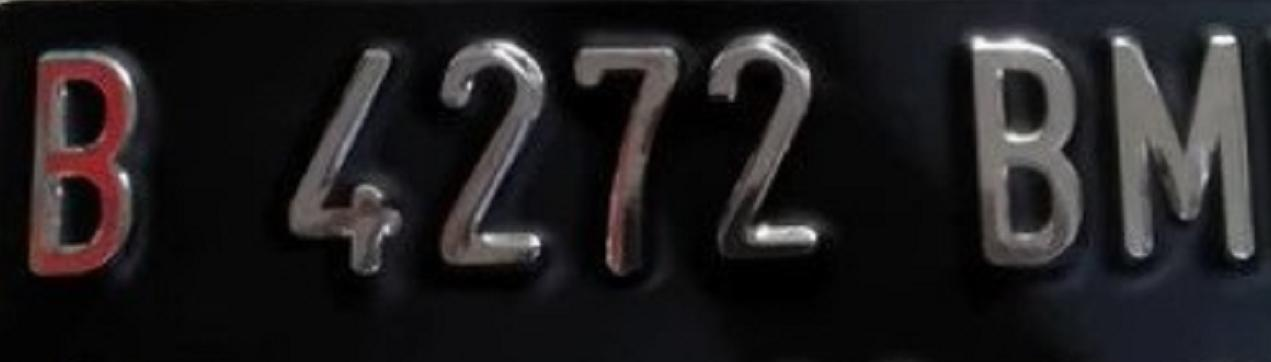

In [72]:
# Load Gambar

img = cv2.imread('/content/drive/MyDrive/Machine Learning/data/2.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img)

In [73]:
# Mencetak tinggi, lebar, saluran warna
h, w, ch= img.shape
print(h)
print(w)
print(ch)

362
1271
3


In [74]:
# Mengubah gambar menjadi data
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(460102, 3)

In [75]:
# Plotting data
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

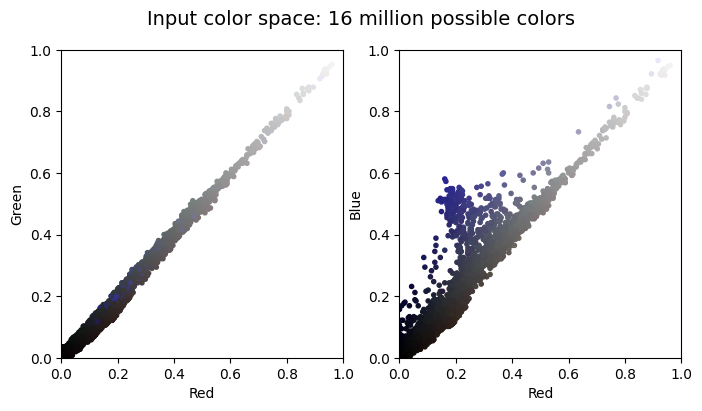

In [76]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


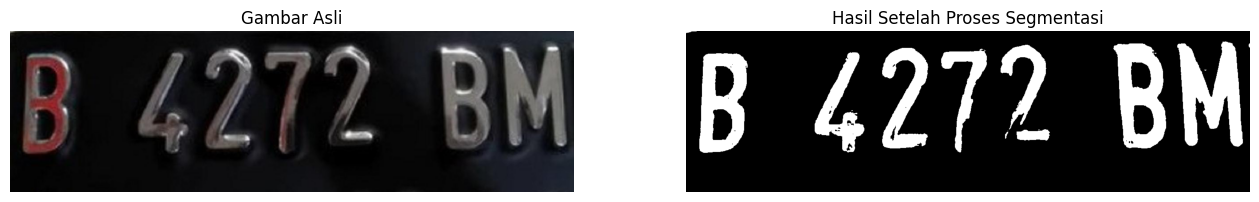

In [77]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

# **PLAT NOMOR 3**

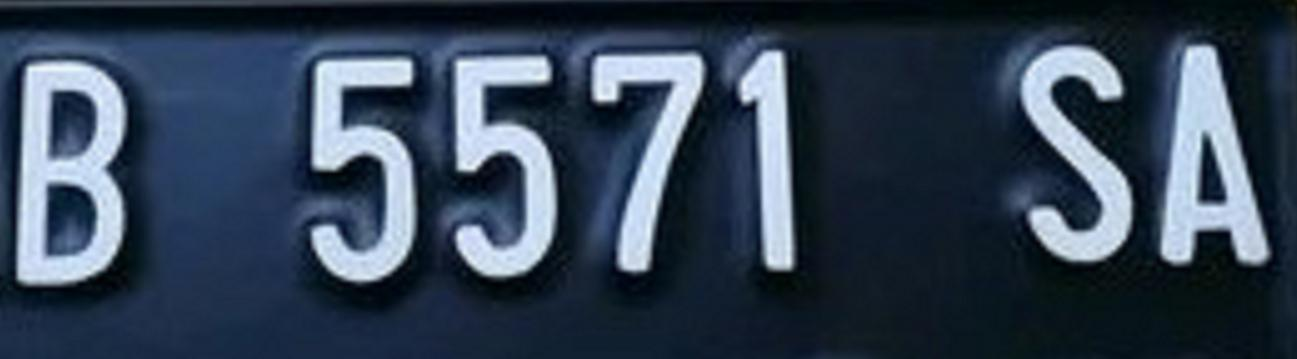

In [78]:
# Load Gambar

img = cv2.imread('/content/drive/MyDrive/Machine Learning/data/3.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img)

In [79]:
# Mencetak tinggi, lebar, saluran warna
h, w, ch= img.shape
print(h)
print(w)
print(ch)

359
1297
3


In [80]:
# Mengubah gambar menjadi data
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(465623, 3)

In [81]:
# Plotting data
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

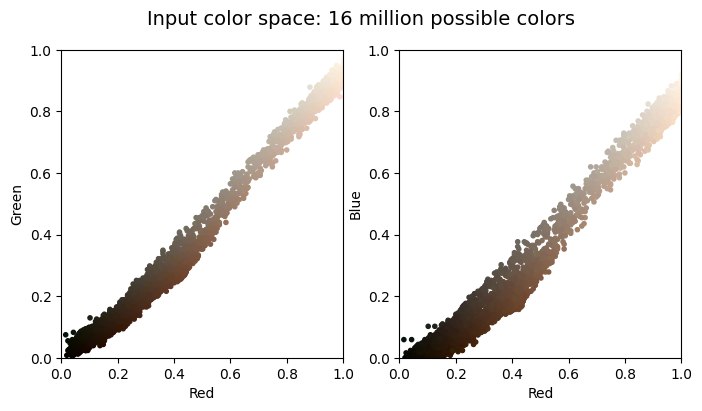

In [82]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


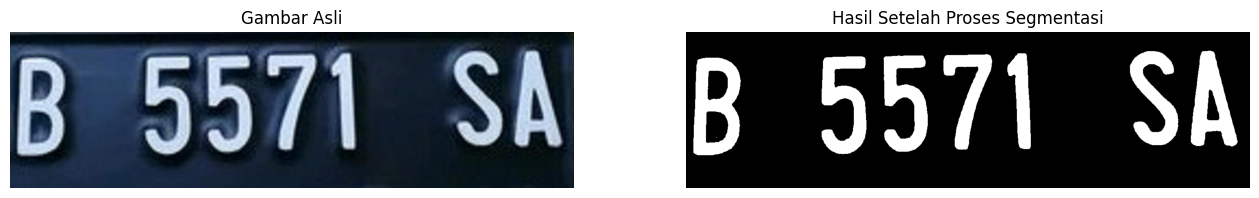

In [83]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

# **PLAT NOMOR 4**

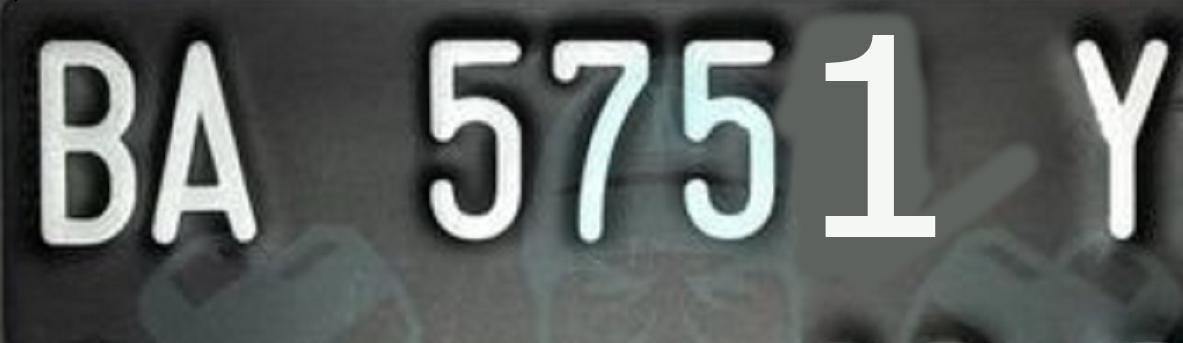

In [85]:
# Load Gambar

img = cv2.imread('/content/drive/MyDrive/Machine Learning/data/4.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img)

In [86]:
# Mencetak tinggi, lebar, saluran warna
h, w, ch= img.shape
print(h)
print(w)
print(ch)

343
1183
3


In [87]:
# Mengubah gambar menjadi data
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(405769, 3)

In [88]:
# Plotting data
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

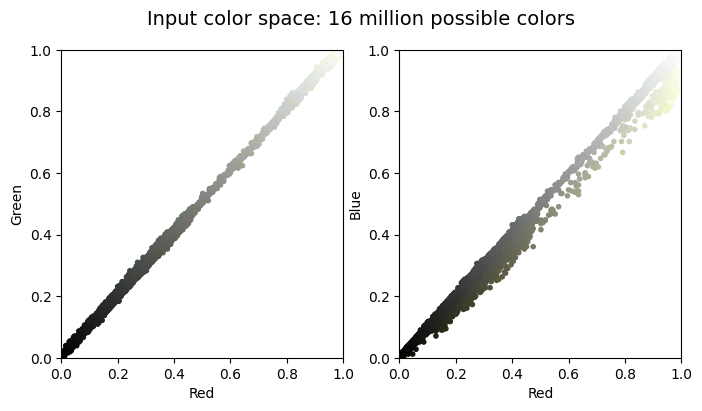

In [89]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


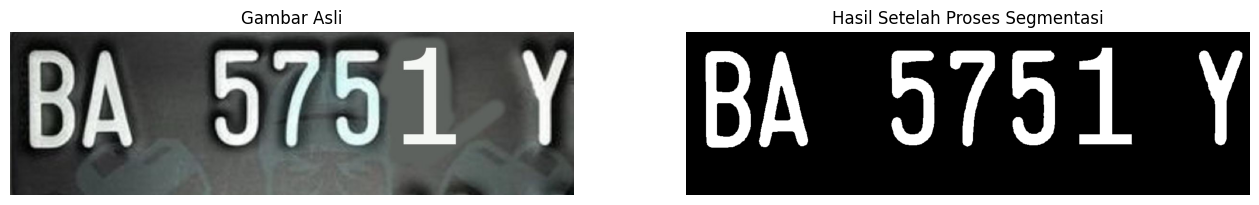

In [90]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

# **PLAT NOMOR 5**

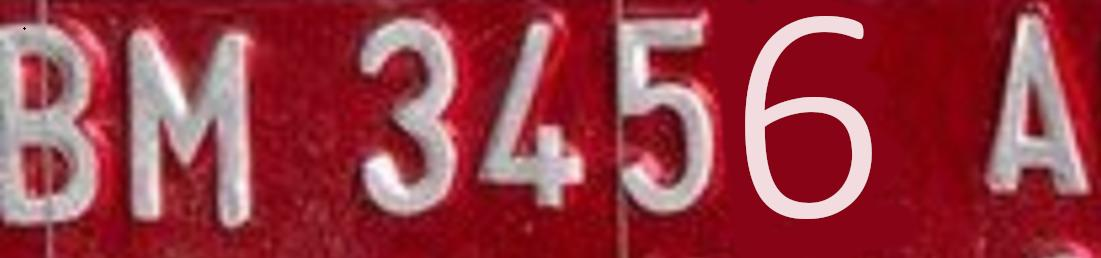

In [91]:
# Load Gambar

img = cv2.imread('/content/drive/MyDrive/Machine Learning/data/5.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img)

In [92]:
# Mencetak tinggi, lebar, saluran warna
h, w, ch= img.shape
print(h)
print(w)
print(ch)

258
1101
3


In [93]:
# Mengubah gambar menjadi data
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [94]:
# Plotting data
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

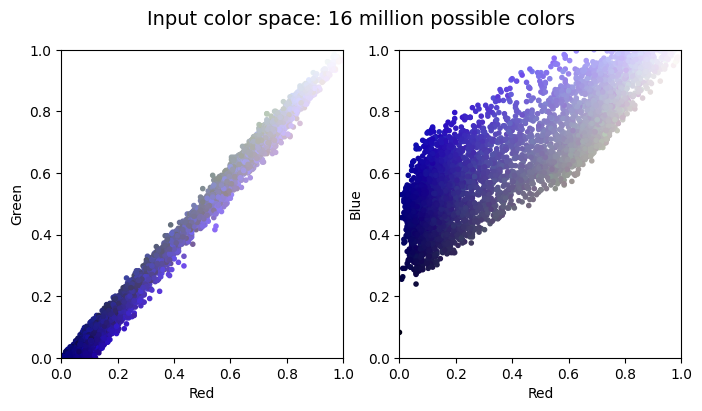

In [95]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


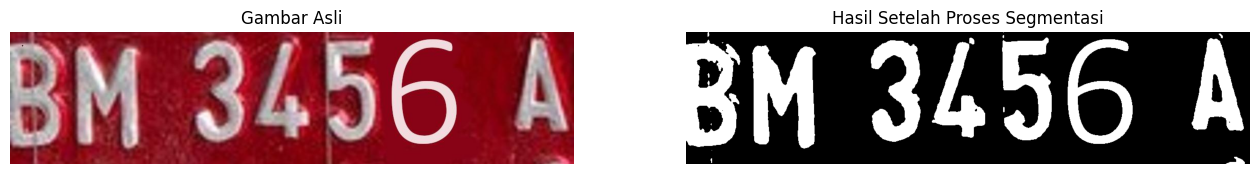

In [96]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()